In [1]:
!zipline bundles

Korea_commodity 2023-12-05 21:01:47.126702
Korea_commodity 2023-12-05 21:01:08.694331
Korea_commodity 2023-12-05 09:01:34.202227
csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


In [2]:
!zipline ingest -b Korea_commodity

[2023-12-06T12:13:35+0600-INFO][zipline.data.bundles.core]
 Ingesting Korea_commodity
Loading custom pricing data:   [####################################]  100%
Merging daily equity files:  [####################################]   


In [4]:
from zipline.api import order_target_percent, symbol, set_commission, set_benchmark, order,record, order_target

In [3]:
def EMA(day, price_hist):
    #price_hist = price_hist.tolist()
    multiplier = 2 / (day + 1)
    EMA_list = []
    EMA_prev = price_hist[0]
    EMA_list.append(EMA_prev)
    for price in price_hist[1:]:
        EMA = (price - EMA_prev) * multiplier + EMA_prev
        EMA_list.append(EMA)
        EMA_prev = EMA
    return EMA_list

In [6]:
def initialize(context):
    context.i = 0
    context.asset = symbol("Kor_gold_mod")


def handle_data(context, data):
    context.i += 1
    if context.i < 30:  # Ensure there are enough days for both short and long moving averages
        return

    # Calculate short-term (fast) and long-term (slow) moving averages
    short_mavg = data.history(context.asset, 'close', bar_count=15, frequency='1d').mean()
    long_mavg = data.history(context.asset, 'close', bar_count=30, frequency='1d').mean()

    # Trading logic
    if short_mavg > long_mavg:
        # Buy signal
        order_target(context.asset, 1)
    elif short_mavg < long_mavg:
        # Sell signal
        order_target(context.asset, 0)

    # Record values for analysis
    record(
        Kor_gold=data.current(context.asset, 'close'),
        short_mavg=short_mavg,
        long_mavg=long_mavg
    )


In [5]:
import pandas as pd
from zipline.utils.calendar_utils import get_calendar
from zipline import run_algorithm
calendar = get_calendar('XKRX')

In [26]:

start_date = pd.to_datetime('2022-11-22 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
end_date = pd.to_datetime('2023-05-02 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
results = run_algorithm(start=start_date,
                            end=end_date,
                            initialize=initialize,
                            handle_data=handle_data,
                            capital_base=10000,
                            benchmark_returns=None,
                            trading_calendar=calendar,
                            bundle='Korea_commodity',
                            data_frequency='daily',
                            )

/home/popeye/.local/lib/python3.10/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
/home/popeye/.local/lib/python3.10/site-packages/empyrical/stats.py:710: RuntimeWarning: invalid value encountered in divide
  np.divide(
/home/popeye/.local/lib/python3.10/site-packages/empyrical/stats.py:799: RuntimeWarning: invalid value encountered in divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [22]:
results.columns

Index(['period_open', 'period_close', 'returns', 'starting_cash',
       'ending_cash', 'portfolio_value', 'longs_count', 'shorts_count',
       'long_value', 'short_value', 'long_exposure', 'pnl', 'short_exposure',
       'capital_used', 'orders', 'transactions', 'gross_leverage', 'positions',
       'net_leverage', 'starting_exposure', 'ending_exposure',
       'starting_value', 'ending_value', 'max_leverage',
       'algorithm_period_return', 'excess_return', 'treasury_period_return',
       'trading_days', 'period_label', 'algo_volatility',
       'benchmark_period_return', 'benchmark_volatility', 'alpha', 'beta',
       'sharpe', 'sortino', 'max_drawdown'],
      dtype='object')

In [29]:
!zipline bundles

btc_data 2023-12-06 09:24:39.574135
btc_data 2023-12-06 09:08:34.147464
btc_data 2023-12-06 08:48:38.522629
btc_data 2023-12-06 07:11:35.095873
btc_data 2023-12-06 07:09:49.169783
btc_data 2023-12-06 06:59:40.016712
btc_data 2023-12-06 06:57:38.673733
btc_data 2023-12-06 06:52:29.766270
btc_data 2023-12-06 06:48:19.378699
btc_data 2023-12-06 06:44:29.529821
btc_data 2023-12-06 06:41:30.237220
btc_data 2023-12-06 06:39:38.158090
csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


In [30]:
!zipline ingest -b btc_data

[2023-12-06T15:39:53+0600-INFO][zipline.data.bundles.core]
 Ingesting btc_data
Loading custom pricing data:   [####################################]  100%
Merging daily equity files:  [####################################]   


In [31]:
calendar = get_calendar('XNYS')


In [32]:
def initialize(context):
    context.i = 0
    context.asset = symbol("btc_data")  


def handle_data(context, data):
    context.i += 1
    if context.i < 2:
        return

    short_mavg = data.history(context.asset, 'close', bar_count=1, frequency='1d').mean()
    long_mavg = data.history(context.asset, 'close', bar_count=2, frequency='1d').mean()

    # Trading logic
    if short_mavg > long_mavg:
        # Buy signal
        order_target_percent(context.asset, 100)  
    elif short_mavg < long_mavg:
        # Sell signal
        order_target_percent(context.asset, 0) 
    record(
        btc_data_close=data.current(context.asset, 'close'),
        short_mavg=short_mavg,
        long_mavg=long_mavg
    )


In [33]:

start_date = pd.to_datetime('2023-11-06 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
end_date = pd.to_datetime('2023-12-04 00:00:00.000000', format='%Y-%m-%d %H:%M:%S.%f')
results = run_algorithm(start=start_date,
                            end=end_date,
                            initialize=initialize,
                            handle_data=handle_data,
                            capital_base=10000,
                            benchmark_returns=None,
                            trading_calendar=calendar,
                            bundle='btc_data',
                            data_frequency='daily',
                        )

/home/popeye/.local/lib/python3.10/site-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns
/home/popeye/.local/lib/python3.10/site-packages/empyrical/stats.py:710: RuntimeWarning: invalid value encountered in divide
  np.divide(
/home/popeye/.local/lib/python3.10/site-packages/empyrical/stats.py:799: RuntimeWarning: invalid value encountered in divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [34]:
results

,period_open,period_close,gross_leverage,long_exposure,ending_exposure,positions,short_exposure,starting_value,orders,portfolio_value,...,max_drawdown,sortino,alpha,beta,algorithm_period_return,trading_days,excess_return,btc_data_close,short_mavg,long_mavg
2023-11-06 21:00:00+00:00,2023-11-06 14:31:00+00:00,2023-11-06 21:00:00+00:00,0.000000,0.0,0.0,[],0.0,0.0,[],1.000000e+04,...,0.000000,NaN,None,None,0.000000,1,0.0,NaN,NaN,NaN
2023-11-07 21:00:00+00:00,2023-11-07 14:31:00+00:00,2023-11-07 21:00:00+00:00,0.000000,0.0,0.0,[],0.0,0.0,"[{'id': 'da005ff1993e4aac889ab75985169bba', 'd...",1.000000e+04,...,0.000000,NaN,None,None,0.000000,2,0.0,35455.0,35455.0,35254.0
2023-11-08 21:00:00+00:00,2023-11-08 14:31:00+00:00,2023-11-08 21:00:00+00:00,105.036124,997948.0,997948.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': 28, '...",0.0,0.0,"[{'id': 'da005ff1993e4aac889ab75985169bba', 'd...",9.500998e+03,...,-0.049900,-9.165151,None,None,-0.049900,3,0.0,35641.0,35641.0,35548.0
2023-11-09 21:00:00+00:00,2023-11-09 14:31:00+00:00,2023-11-09 21:00:00+00:00,25.337713,990873.0,990873.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': 27, '...",0.0,997948.0,"[{'id': 'fd8d5b46deac47e69678936046f07466', 'd...",3.910665e+04,...,-0.049900,487.710743,None,None,2.910665,4,0.0,36699.0,36699.0,36170.0
2023-11-10 21:00:00+00:00,2023-11-10 14:31:00+00:00,2023-11-10 21:00:00+00:00,73.373780,3953906.0,3953906.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': 106, ...",0.0,990873.0,"[{'id': '256a5ffbbefd4ac8ba5600df29d4d219', 'd...",5.388718e+04,...,-0.049900,489.993286,None,None,4.388718,5,0.0,37301.0,37301.0,37000.0
2023-11-13 21:00:00+00:00,2023-11-13 14:31:00+00:00,2023-11-13 21:00:00+00:00,-172.117012,5257584.0,5257584.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': 144, ...",0.0,3953906.0,"[{'id': '67314562cf0b48fbb7707216a841932c', 'd...",-3.054657e+04,...,-1.566862,7.760611,None,None,-4.054657,6,0.0,36511.0,36511.0,36906.0
2023-11-14 21:00:00+00:00,2023-11-14 14:31:00+00:00,2023-11-14 21:00:00+00:00,-0.000000,0.0,0.0,[],0.0,5257584.0,"[{'id': '20f9c47cf178411dbd35d1184f946151', 'd...",-1.726417e+05,...,-4.203763,24.988922,None,None,-18.264174,7,0.0,35542.0,35542.0,36026.5
2023-11-15 21:00:00+00:00,2023-11-15 14:31:00+00:00,2023-11-15 21:00:00+00:00,-0.000000,0.0,0.0,[],0.0,0.0,"[{'id': '837fe7fac27748459c10df49b381da79', 'd...",-1.726417e+05,...,-4.203763,23.374996,None,None,-18.264174,8,0.0,37865.0,37865.0,36703.5
2023-11-16 21:00:00+00:00,2023-11-16 14:31:00+00:00,2023-11-16 21:00:00+00:00,-19.907699,0.0,-3471456.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': -96, ...",-3471456.0,0.0,"[{'id': '837fe7fac27748459c10df49b381da79', 'd...",-1.743776e+05,...,-4.235975,22.072096,None,None,-18.437756,9,0.0,36161.0,36161.0,37013.0
2023-11-17 21:00:00+00:00,2023-11-17 14:31:00+00:00,2023-11-17 21:00:00+00:00,-30.483117,0.0,-6740104.0,"[{'sid': Equity(0 [BTC_DATA]), 'amount': -184,...",-6740104.0,-3471456.0,"[{'id': '837fe7fac27748459c10df49b381da79', 'd...",-2.211094e+05,...,-5.103191,21.797596,None,None,-23.110941,10,0.0,36631.0,36631.0,36396.0


<Axes: >

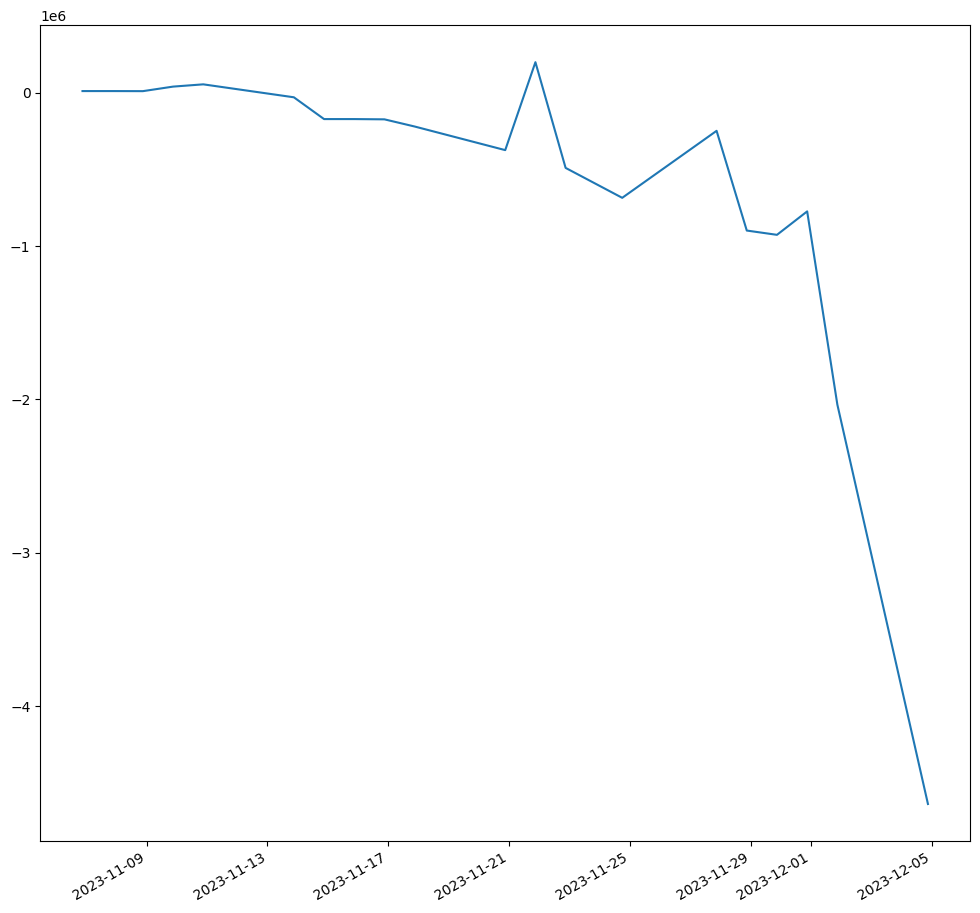

In [38]:
results['portfolio_value'].plot()

In [36]:
%pylab inline
figsize(12,12)
import matplotlib.pyplot as plt



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/popeye/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['record']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
